In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering, BisectingKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
import optuna

## Carregar os dados

In [ ]:
df_laptop = pd.read_csv('./dataset/laptops_new.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     991 non-null    int64  
 1   brand                     991 non-null    object 
 2   model                     991 non-null    object 
 3   price                     991 non-null    float64
 4   rating                    991 non-null    int64  
 5   processor_brand           991 non-null    object 
 6   processor_tier            991 non-null    object 
 7   num_cores                 991 non-null    int64  
 8   num_threads               991 non-null    int64  
 9   ram_memory                991 non-null    int64  
 10  primary_storage_type      991 non-null    object 
 11  primary_storage_capacity  991 non-null    int64  
 12  gpu_brand                 991 non-null    object 
 13  gpu_type                  991 non-null    object 
 14  is_touch_s

In [12]:
df_laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     991 non-null    int64  
 1   brand                     991 non-null    object 
 2   model                     991 non-null    object 
 3   price                     991 non-null    float64
 4   rating                    991 non-null    int64  
 5   processor_brand           991 non-null    object 
 6   processor_tier            991 non-null    object 
 7   num_cores                 991 non-null    int64  
 8   num_threads               991 non-null    int64  
 9   ram_memory                991 non-null    int64  
 10  primary_storage_type      991 non-null    object 
 11  primary_storage_capacity  991 non-null    int64  
 12  gpu_brand                 991 non-null    object 
 13  gpu_type                  991 non-null    object 
 14  is_touch_s

In [3]:
df_laptop.head()

,index,brand,model,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,primary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,os,year_of_warranty
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,287.72,63,intel,core i3,2,4,8,SSD,512,intel,integrated,False,15.6,1920,1080,windows,1
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,431.64,67,intel,core i7,4,8,16,SSD,1024,intel,integrated,False,15.6,1920,1080,windows,1
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,612.86,73,amd,ryzen 5,6,12,8,SSD,512,amd,dedicated,False,15.6,1920,1080,windows,1
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,479.62,62,intel,core i5,12,16,8,SSD,512,intel,integrated,False,14.0,1920,1080,windows,1
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,342.77,62,amd,ryzen 3,4,8,8,SSD,512,amd,integrated,False,15.6,1920,1080,windows,1


## EDA

In [11]:
# Estatísticas das Variáveis

df_laptop.describe()

,index,price,rating,num_cores,num_threads,ram_memory,primary_storage_capacity,is_touch_screen,display_size,resolution_width,resolution_height,year_of_warranty
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,505.860747,926.687487,63.931382,8.128153,12.191726,13.047427,610.938446,0.088799,15.171241,2003.503532,1181.227043,1.083754
std,287.899458,688.239764,10.190575,4.215499,5.585115,5.591188,266.927666,0.284597,0.938089,361.965292,263.884019,0.311478
min,1.000000,117.540000,24.000000,2.000000,0.000000,2.000000,32.000000,0.000000,10.100000,1080.000000,768.000000,1.000000
25%,258.500000,522.850000,58.000000,6.000000,8.000000,8.000000,512.000000,0.000000,14.000000,1920.000000,1080.000000,1.000000
50%,507.000000,742.390000,64.000000,8.000000,12.000000,16.000000,512.000000,0.000000,15.600000,1920.000000,1080.000000,1.000000
75%,754.500000,1070.350000,71.000000,10.000000,16.000000,16.000000,512.000000,0.000000,15.600000,1920.000000,1200.000000,1.000000
max,1002.000000,5450.880000,89.000000,24.000000,32.000000,36.000000,2048.000000,1.000000,18.000000,3840.000000,2560.000000,3.000000


In [6]:
# Checar variável year_fo_warranty
df_laptop['year_of_warranty'].unique()

array(['1', '2', 'No information', '3'], dtype=object)

In [7]:
df_laptop.loc[df_laptop['year_of_warranty'] == 'No information' , 'year_of_warranty'] = 1
df_laptop['year_of_warranty'] = df_laptop['year_of_warranty'].astype(int)

In [ ]:
# Transformar varíavel binaria em int (is_touch_screen)

df_laptop['is_touch_screen'] = df_laptop['is_touch_screen'].astype(int)

In [20]:
# Distribuição da variável brand

percentual_brand = (df_laptop.value_counts('brand')/ len(df_laptop)) * 100
px.bar(percentual_brand, color=percentual_brand.index) 

In [21]:
# Distribuição da variável processor_brand
percentual_processor_brand = (df_laptop.value_counts('processor_brand')/ len(df_laptop)) * 100
px.bar(percentual_processor_brand, color=percentual_processor_brand.index) 

<Axes: xlabel='price', ylabel='Count'>

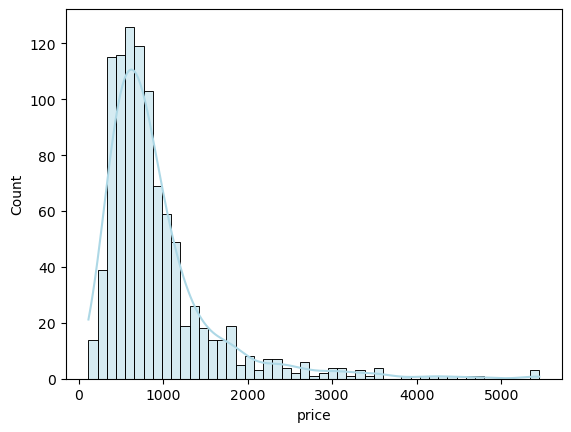

In [22]:
# Distribuição da variável price
sns.histplot(df_laptop['price'], kde=True, color='lightblue')

<Axes: xlabel='rating', ylabel='Count'>

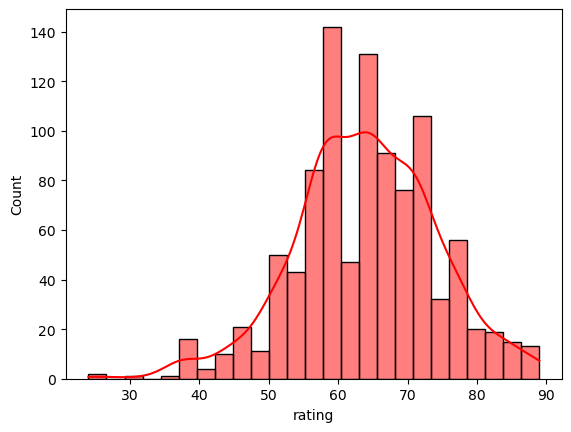

In [23]:
# Distribuição da variável rating
sns.histplot(df_laptop['rating'], kde=True, color='red')

In [24]:
# Plot de distribuição por brand e price
px.box(df_laptop, x='price',y='brand', color='brand', orientation='h')

In [25]:
# Plot de distribuição por brand e Rating
px.box(df_laptop, x='rating',y='brand', color='brand', orientation='h')

In [27]:
# Scatterplot de price e rating
px.scatter(df_laptop, x='price', y='rating', color='brand')

## Treinar modelos clustering hierarquico

In [28]:
X = df_laptop.copy()
X.drop(columns=['model','index'],inplace=True)



In [29]:
X

,brand,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,primary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,os,year_of_warranty
0,tecno,287.72,63,intel,core i3,2,4,8,SSD,512,intel,integrated,0,15.6,1920,1080,windows,1
1,tecno,431.64,67,intel,core i7,4,8,16,SSD,1024,intel,integrated,0,15.6,1920,1080,windows,1
2,hp,612.86,73,amd,ryzen 5,6,12,8,SSD,512,amd,dedicated,0,15.6,1920,1080,windows,1
3,acer,479.62,62,intel,core i5,12,16,8,SSD,512,intel,integrated,0,14.0,1920,1080,windows,1
4,lenovo,342.77,62,amd,ryzen 3,4,8,8,SSD,512,amd,integrated,0,15.6,1920,1080,windows,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,asus,791.44,68,amd,ryzen 5,6,12,16,SSD,512,nvidia,dedicated,0,15.6,1920,1080,windows,1
987,msi,1103.27,73,intel,core i7,10,16,16,SSD,512,nvidia,dedicated,0,15.6,1920,1080,windows,2
988,asus,539.58,59,amd,ryzen 5,4,8,8,SSD,512,amd,integrated,0,15.6,1920,1080,windows,1
989,asus,815.43,68,amd,ryzen 5,6,12,16,SSD,512,amd,integrated,0,14.0,2560,1600,windows,1


In [30]:
# Separando variáveis numericas e categorias

numeric_features = ['price','rating','num_cores','num_threads','ram_memory','primary_storage_capacity',
                    'display_size','resolution_width','resolution_height']
categorical_features = ['brand','processor_brand','gpu_brand','gpu_type','os']

In [31]:
# Aplicar transformações

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

In [32]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',numeric_transformer,numeric_features),
        ('cat',categorical_transformer,categorical_features)
    ]
)

X_preprocess = preprocessor.fit_transform(X)

In [34]:
X_preprocess.shape

(991, 54)

In [42]:
def hierarchical_aglomerative_objective(trial):
    # Definindo os hiperparâmetros a serem ajustados

    n_clusters = trial.suggest_int('n_clusters', 10, 150)
    # Linkage = Critério de distância entre 2 conjuntos para formar os clusters
    # ward = variância
    # Average = média
    # Complete = Máxima
    # Single = mínima
    linkage = trial.suggest_categorical('linkage',['ward','average','complete','single'])

    # Instanciar o modelo
    hierarquical_model = AgglomerativeClustering(linkage=linkage, n_clusters=n_clusters)

    # Treinar o modelo e já executar a clusterização

    y = hierarquical_model.fit_predict(X_preprocess.toarray())

    # Calcular o Silhouette Score
    silhouette_avg = silhouette_score(X_preprocess,y)

    return silhouette_avg


In [36]:
# Criar o estudo no optuna

search_space_ag = {'n_clusters': list(range(10,151)), 'linkage': ['ward','average','complete','single']}
sampler = optuna.samplers.GridSampler(search_space=search_space_ag)
estudo_ag = optuna.create_study(sampler=sampler, direction='maximize')

[I 2025-12-22 11:14:00,922] A new study created in memory with name: no-name-b7066eca-ba03-42ba-95e3-ce3ec2334e97


In [ ]:
estudo_ag.optimize(hierarchical_aglomerative_objective,n_trials=600)

[I 2025-12-22 11:14:25,230] Trial 0 finished with value: 0.2234907963314824 and parameters: {'n_clusters': 108, 'linkage': 'average'}. Best is trial 0 with value: 0.2234907963314824.
[I 2025-12-22 11:14:25,278] Trial 1 finished with value: 0.17524794730527618 and parameters: {'n_clusters': 44, 'linkage': 'complete'}. Best is trial 0 with value: 0.2234907963314824.
[I 2025-12-22 11:14:25,325] Trial 2 finished with value: 0.18192511775951023 and parameters: {'n_clusters': 57, 'linkage': 'average'}. Best is trial 0 with value: 0.2234907963314824.
[I 2025-12-22 11:14:25,369] Trial 3 finished with value: 0.17426651499876017 and parameters: {'n_clusters': 46, 'linkage': 'complete'}. Best is trial 0 with value: 0.2234907963314824.
[I 2025-12-22 11:14:25,416] Trial 4 finished with value: 0.22831449937222206 and parameters: {'n_clusters': 140, 'linkage': 'complete'}. Best is trial 4 with value: 0.22831449937222206.
[I 2025-12-22 11:14:25,460] Trial 5 finished with value: 0.2354443546476447 and 

In [41]:
best_params_ag = estudo_ag.best_params

print(f'Clusters = {best_params_ag['n_clusters']}')
print(f'Linkage = {best_params_ag['linkage']}')

Clusters = 149
Linkage = ward


In [43]:
def hierarchical_divisive_objective(trial):
    # Definindo os hiperparâmetros a serem ajustados

    n_clusters = trial.suggest_int('n_clusters', 10, 150)

    # Instanciar o modelo
    hierarquical_model = BisectingKMeans(n_clusters=n_clusters)

    # Treinar o modelo e já executar a clusterização

    y = hierarquical_model.fit_predict(X_preprocess.toarray())

    # Calcular o Silhouette Score
    silhouette_avg = silhouette_score(X_preprocess,y)

    return silhouette_avg


In [44]:
# criando um estudo para o divisivo tb
search_space_dv = {'n_clusters': list(range(10,151))}
sampler_dv = optuna.samplers.GridSampler(search_space=search_space_dv)
estudo_di = optuna.create_study(sampler=sampler_dv,direction='maximize') 

[I 2025-12-22 11:23:16,244] A new study created in memory with name: no-name-0633c3c1-0449-4e15-919b-4cbc25050ba6


In [45]:
estudo_di.optimize(hierarchical_divisive_objective,n_trials=600)

[I 2025-12-22 11:23:34,091] Trial 0 finished with value: 0.14650055457884043 and parameters: {'n_clusters': 55}. Best is trial 0 with value: 0.14650055457884043.
[I 2025-12-22 11:23:34,156] Trial 1 finished with value: 0.17441112241155282 and parameters: {'n_clusters': 70}. Best is trial 1 with value: 0.17441112241155282.
[I 2025-12-22 11:23:34,194] Trial 2 finished with value: 0.1445239726335343 and parameters: {'n_clusters': 17}. Best is trial 1 with value: 0.17441112241155282.
[I 2025-12-22 11:23:34,252] Trial 3 finished with value: 0.14127116072733542 and parameters: {'n_clusters': 61}. Best is trial 1 with value: 0.17441112241155282.
[I 2025-12-22 11:23:34,310] Trial 4 finished with value: 0.16115867867287728 and parameters: {'n_clusters': 76}. Best is trial 1 with value: 0.17441112241155282.
[I 2025-12-22 11:23:34,365] Trial 5 finished with value: 0.15363765417701294 and parameters: {'n_clusters': 37}. Best is trial 1 with value: 0.17441112241155282.
[I 2025-12-22 11:23:34,448] T

In [46]:
best_params_dv = estudo_di.best_params
print(f"N_clusters = {best_params_dv['n_clusters']}")

N_clusters = 143


In [47]:
# Criar modelo com melhor configuração (Aglomerative)

best_model = AgglomerativeClustering(n_clusters=best_params_ag['n_clusters'],linkage=best_params_ag['linkage'])

best_model.fit(X_preprocess.toarray())

,n_clusters,149
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


In [48]:
# Verificar Silhouette Score
best_score = silhouette_score(X_preprocess, best_model.labels_)

In [49]:
best_score

0.32745480721431686

In [50]:
# Criar uma coluna com cluster escolhido no Dataframe original
df_laptop['cluster'] = best_model.labels_

In [51]:
df_laptop.head()

,index,brand,model,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,primary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,os,year_of_warranty,cluster
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,287.72,63,intel,core i3,2,4,8,...,512,intel,integrated,0,15.6,1920,1080,windows,1,73
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,431.64,67,intel,core i7,4,8,16,...,1024,intel,integrated,0,15.6,1920,1080,windows,1,44
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,612.86,73,amd,ryzen 5,6,12,8,...,512,amd,dedicated,0,15.6,1920,1080,windows,1,28
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,479.62,62,intel,core i5,12,16,8,...,512,intel,integrated,0,14.0,1920,1080,windows,1,53
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,342.77,62,amd,ryzen 3,4,8,8,...,512,amd,integrated,0,15.6,1920,1080,windows,1,14


## Visualizar resultados

In [53]:
# Mostrar Chart com Trials do Optuna

fig = optuna.visualization.plot_optimization_history(estudo_ag)
fig.show()

In [54]:
# Treinar modelo com Scipy
modelo_de = linkage(X_preprocess.toarray(), method=best_params_ag['linkage'], optimal_ordering=True)

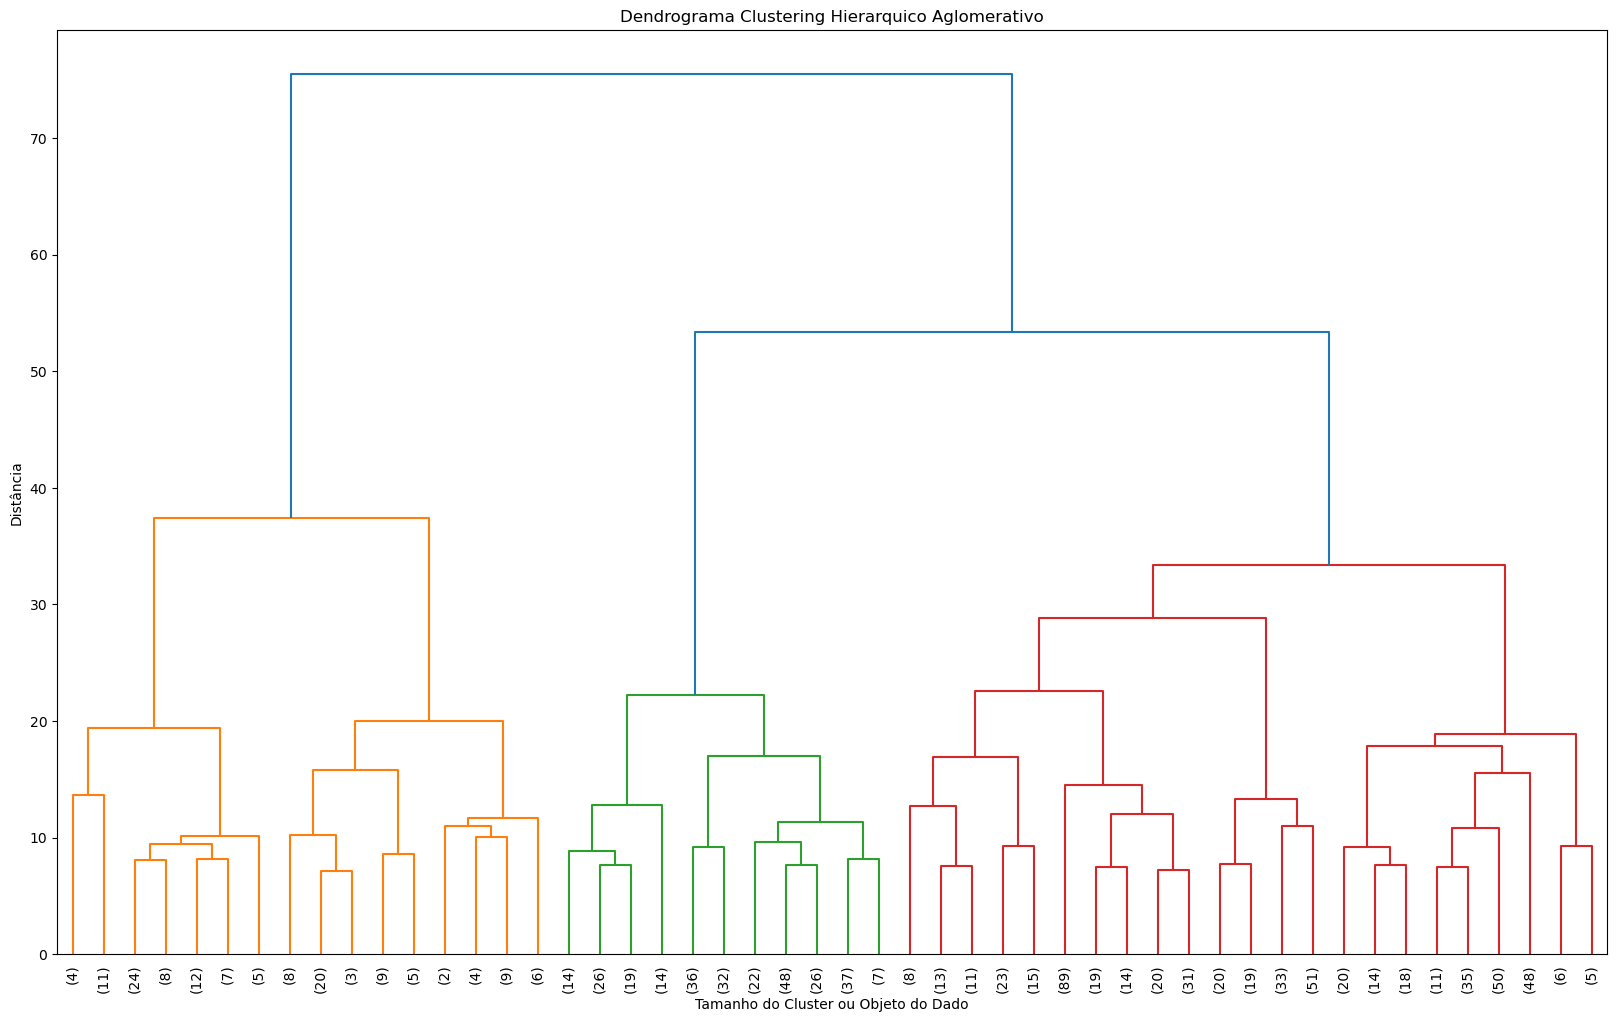

In [57]:
# Mostrar Dendrograma
plt.figure(figsize=(20,12))
dendrogram(modelo_de, truncate_mode='lastp', p=50, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrograma Clustering Hierarquico Aglomerativo')
plt.xlabel('Tamanho do Cluster ou Objeto do Dado')
plt.ylabel('Distância')
plt.show()

In [58]:
# Cortar o Dendograma
clusters_de_scipy = cut_tree(modelo_de,height=32)
len(np.unique(clusters_de_scipy))

5

In [59]:
# Cruzamento entre brand e price, apresentando os clusters
px.scatter(df_laptop,x='brand',y='price',color='cluster')

In [61]:
px.scatter(df_laptop,x='cluster',y='price',color='brand')

In [62]:
percentual_cluster = df_laptop.value_counts('cluster')/ len(df_laptop) * 100
px.bar(percentual_cluster, color=percentual_cluster.index)

In [63]:
qtde_cluster = df_laptop.value_counts('cluster')
px.bar(qtde_cluster, color=qtde_cluster.index)

## Salvar Modelo, preprocessor e CVS Atualizado

In [64]:
import joblib

joblib.dump(best_model,'./modelo_clusterizacao_laptops.pkl')
joblib.dump(preprocessor, '.preprocessor_clusterizacao_laptops.pkl')

['.preprocessor_clusterizacao_laptops.pkl']

In [65]:
# Salvar Cvs atualizado
df_laptop.to_csv('./dataset/clusterizacao_laptops.csv', index=False)